## Final Project - Week 2 Report

* Introduction where you discuss the business problem and who would be interested in this project.
* Data where you describe the data that will be used to solve the problem and the source of the data.
* Methodology section which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, if any, and what machine learnings were used and why.
* Results section where you discuss the results.
* Discussion section where you discuss any observations you noted and any recommendations you can make based on the results.
* Conclusion section where you conclude the report.

### Introduction

For this project, I will build a few machine learning models to predict the severity of an accident. In the real world, it happens frequently that people drive to another city for work or to visit some friends. It is rainy and windy, and on the way, people come across a terrible traffic jam on the other side of the highway. Long lines of cars barely moving. Police cars start appearing from afar shutting down the highway while you are driving. In an effort to reduce the frequency of car collisions in a community, an algorithm must be developed to predict the severity of an accident given the current weather, road and visibility conditions. When conditions are bad, this model will alert drivers to remind them to be more careful.

### Describe the Data 

Our dependent variable (target) will be 'SEVERITYCODE' in the dataset. It is used measure the severity of an accident from 0 to 5 within the dataset. Attributes used to weigh the severity of an accident will be selected after pre-processing the data.

In [15]:
# The code was removed by Watson Studio for sharing.

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


The dataset in the original form is not ready for data analysis. In order to prepare the data, first, we need to drop the non-relevant columns. In addition, most of the features are of object data types that need to be converted into numerical data types.
After analyzing the data set, I have decided to focus on only four features, severity, weather conditions, road conditions, and light conditions, among others.
To get a good understanding of the dataset, I have checked different values in the features. The results show, the target feature is imbalance, so we use a simple statistical technique to balance it.

In [16]:
data["SEVERITYCODE"].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [17]:
data["WEATHER"].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [18]:
data["ROADCOND"].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [19]:
data["LIGHTCOND"].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [20]:
pd.concat([data.dtypes, data.isna().sum()], axis=1, 
          keys=["Data Types", "Null Values"]).sort_values(by=["Null Values"], ascending=False)

,Data Types,Null Values
PEDROWNOTGRNT,object,190006
EXCEPTRSNDESC,object,189035
SPEEDING,object,185340
INATTENTIONIND,object,164868
INTKEY,float64,129603
EXCEPTRSNCODE,object,109862
SDOTCOLNUM,float64,79737
JUNCTIONTYPE,object,6329
X,float64,5334
Y,float64,5334


In [21]:
# dropping features with more than 50% missing values
data.drop(columns=["PEDROWNOTGRNT", "EXCEPTRSNDESC", "SPEEDING", "INATTENTIONIND", "INTKEY", "EXCEPTRSNCODE"], inplace=True)
pd.concat([data.dtypes, data.isna().sum()], axis=1, 
          keys=["Data Types", "Null Values"]).sort_values(by=["Null Values"], ascending=False)

,Data Types,Null Values
SDOTCOLNUM,float64,79737
JUNCTIONTYPE,object,6329
Y,float64,5334
X,float64,5334
LIGHTCOND,object,5170
WEATHER,object,5081
ROADCOND,object,5012
ST_COLDESC,object,4904
COLLISIONTYPE,object,4904
UNDERINFL,object,4884


In [22]:
# drop the columns which are not usefull for our model.
drop_cols = ["SEVERITYCODE.1", "SEVERITYDESC", "SDOTCOLNUM", "X", "Y", "ST_COLDESC", "LOCATION", "SDOT_COLDESC", 
             "INCDTTM", "INCDATE", "REPORTNO", "COLDETKEY", "INCKEY", "OBJECTID", "STATUS"]
data.drop(columns=drop_cols, inplace=True)
data.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,Intersection,Angles,2,0,0,2,At Intersection (intersection related),11,N,Overcast,Wet,Daylight,10,0,0,N
1,1,Block,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),16,0,Raining,Wet,Dark - Street Lights On,11,0,0,N
2,1,Block,Parked Car,4,0,0,3,Mid-Block (not related to intersection),14,0,Overcast,Dry,Daylight,32,0,0,N
3,1,Block,Other,3,0,0,3,Mid-Block (not related to intersection),11,N,Clear,Dry,Daylight,23,0,0,N
4,2,Intersection,Angles,2,0,0,2,At Intersection (intersection related),11,0,Raining,Wet,Daylight,10,0,0,N


In [23]:
pd.concat([data.dtypes, data.isna().sum()], axis=1, 
          keys=["Data Types", "Null Values"]).sort_values(by=["Null Values"], ascending=False)

,Data Types,Null Values
JUNCTIONTYPE,object,6329
LIGHTCOND,object,5170
WEATHER,object,5081
ROADCOND,object,5012
COLLISIONTYPE,object,4904
UNDERINFL,object,4884
ADDRTYPE,object,1926
ST_COLCODE,object,18
SEVERITYCODE,int64,0
CROSSWALKKEY,int64,0


#### Train Test Split

In [24]:
data_y = data[["SEVERITYCODE"]]
data_X = data.drop(columns=["SEVERITYCODE"])

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.30, random_state=42, stratify=data_y, shuffle=True)

#### Data Processing

In [26]:
pd.options.mode.chained_assignment = None
X_train["UNDERINFL"] = X_train["UNDERINFL"].apply(lambda x: 'N' if x=='0' else 'Y' if x=='1' else x)
X_train["UNDERINFL"].value_counts()

N    126438
Y      6373
Name: UNDERINFL, dtype: int64

In [28]:
import numpy as np
import math
X_train["ST_COLCODE"] = X_train["ST_COLCODE"].apply(lambda x: np.nan if x==' ' else int(x) if isinstance(x, str) else x)
X_train["ST_COLCODE"].unique()

array([14., 28., 13., 32., nan,  0., 50., 22., 10., 26., 20., 15., 11.,
       23., 71., 45., 52., 81., 51., 12., 24., 16., 21.,  1., 29., 88.,
        3.,  2.,  6., 74., 30., 27., 57., 83., 19., 56.,  5., 53., 31.,
       73., 84.,  8.,  4., 40., 25., 72., 17., 41., 82., 54., 65., 48.,
       64.,  7., 66., 85., 67., 42., 18., 43., 60., 49., 87.])

In [29]:
train = pd.concat([X_train, y_train], axis=1)
print("Total distribution of training data:")
print(train['SEVERITYCODE'].value_counts())
print("")
print("Total distribution of missing data we are planning to drop:")
print(train[train.isna().any(axis=1)]['SEVERITYCODE'].value_counts())

Total distribution of training data:
1    95539
2    40732
Name: SEVERITYCODE, dtype: int64

Total distribution of missing data we are planning to drop:
1    7151
2    1086
Name: SEVERITYCODE, dtype: int64


In [30]:
# It seems safe to drop the missing data rows as the proportion of data dropped is okay
train = train.dropna()
y_train = train[["SEVERITYCODE"]]
X_train = train.drop(columns=["SEVERITYCODE"])
pd.concat([train.dtypes, train.isna().sum()], axis=1, 
          keys=["Data Types", "Null Values"]).sort_values(by=["Null Values"], ascending=False)

,Data Types,Null Values
ADDRTYPE,object,0
WEATHER,object,0
HITPARKEDCAR,object,0
CROSSWALKKEY,int64,0
SEGLANEKEY,int64,0
ST_COLCODE,float64,0
LIGHTCOND,object,0
ROADCOND,object,0
UNDERINFL,object,0
COLLISIONTYPE,object,0


In [31]:
#Preparing X and Y for modelling
y_train = y_train.values.ravel()
X_train.reset_index(drop=True, inplace=True)

In [32]:
# Features with many categories, pending to experiment with
print("Feature SEGLANEKEY, training categories:",len(X_train["SEGLANEKEY"].unique()))
print("Feature CROSSWALKKEY, training categories:",len(X_train["CROSSWALKKEY"].unique()))
print("Feature SDOT_COLCODE, training categories:",len(X_train["SDOT_COLCODE"].unique()))
print("Feature ST_COLCODE, training categories:",len(X_train["ST_COLCODE"].unique()))
#X_train.drop(columns=["SEGLANEKEY", "CROSSWALKKEY", "SDOT_COLCODE", "ST_COLCODE"], inplace=True)

Feature SEGLANEKEY, training categories: 1451
Feature CROSSWALKKEY, training categories: 1733
Feature SDOT_COLCODE, training categories: 39
Feature ST_COLCODE, training categories: 62


In [33]:
X_train["HITPARKEDCAR"] = X_train["HITPARKEDCAR"].apply(lambda x: 1 if x=='Y' else 0)
X_train["UNDERINFL"] = X_train["UNDERINFL"].apply(lambda x: 1 if x=='Y' else 0)

In [35]:
oh_encodings = {}
def one_hot(df, cols):
    global oh_encodings
    for col in cols:
        dummy = pd.get_dummies(df[col], prefix=col)
        if col+"_Unknown" in dummy.columns:
            dummy.drop(columns=[col+"_Unknown"], inplace=True)
        elif col+"_Others" in dummy.columns:
            dummy.drop(columns=[col+"_Other"], inplace=True)
        else:
            dummy.drop(columns=[dummy.columns[-1]], inplace=True)
        oh_encodings[col] = list(dummy.columns)
        df = pd.concat([df, dummy], axis=1)
        df.drop(columns=[col], inplace = True)  
    return df

In [36]:
# Feature Hashing for very high cardinality nominal features
hashing_dict = {}
from copy import deepcopy
from sklearn.feature_extraction import FeatureHasher
def featurehash(df, cols):
    global hashing_dict
    fh = FeatureHasher(n_features=30, input_type='string')
    for col in cols:
        df[col] = df[col].astype(str)
        hashed_features = fh.fit_transform(df[col])
        fh_fit = deepcopy(fh)
        hashing_dict[col] = fh_fit
        hashed_features = hashed_features.toarray()
        dummy = pd.DataFrame(hashed_features)
        for name in dummy.columns:
            dummy.rename(columns={name:col+'_'+str(name)}, inplace=True)
        df = pd.concat([df, dummy], axis=1)
        df.drop(columns=[col], inplace = True)
    return df

In [37]:
X_train.head()

,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,Block,Rear Ended,2,0,0,2,Mid-Block (but intersection related),14,0,Clear,Wet,Daylight,14.0,0,0,0
1,Intersection,Left Turn,2,0,0,2,At Intersection (intersection related),11,0,Clear,Dry,Daylight,28.0,0,0,0
2,Block,Rear Ended,4,0,0,2,Mid-Block (but intersection related),14,0,Clear,Dry,Daylight,14.0,0,0,0
3,Block,Rear Ended,3,0,0,2,Mid-Block (not related to intersection),14,0,Clear,Dry,Dark - Street Lights On,13.0,0,0,0
4,Block,Parked Car,2,0,0,2,Mid-Block (not related to intersection),11,0,Clear,Dry,Daylight,32.0,0,0,0


In [38]:
oh_cols = ["ADDRTYPE", "WEATHER", "LIGHTCOND", "ROADCOND", "COLLISIONTYPE", "JUNCTIONTYPE","SDOT_COLCODE", "ST_COLCODE"]
X_train = one_hot(X_train, oh_cols)
hash_cols = ["SEGLANEKEY", "CROSSWALKKEY"]
X_train = featurehash(X_train, hash_cols)
X_train.head()

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,HITPARKEDCAR,ADDRTYPE_Alley,ADDRTYPE_Block,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,...,CROSSWALKKEY_20,CROSSWALKKEY_21,CROSSWALKKEY_22,CROSSWALKKEY_23,CROSSWALKKEY_24,CROSSWALKKEY_25,CROSSWALKKEY_26,CROSSWALKKEY_27,CROSSWALKKEY_28,CROSSWALKKEY_29
0,2,0,0,2,0,0,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0,0,2,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,0,0,2,0,0,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0,0,2,0,0,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,0,0,2,0,0,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)
importance = model.feature_importances_
# summarize feature importance
less_imp = pd.DataFrame(columns=["Feature", "Importance"]) 
for i,v in enumerate(importance):
    less_imp = less_imp.append({"Feature":X_train.columns[i], "Importance":v}, ignore_index=True)
less_imp.sort_values(by=["Importance"], inplace=True)
less_imp.iloc[:40, :]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,Feature,Importance
207,CROSSWALKKEY_29,0.0
175,SEGLANEKEY_27,0.0
174,SEGLANEKEY_26,0.0
173,SEGLANEKEY_25,0.0
172,SEGLANEKEY_24,0.0
171,SEGLANEKEY_23,0.0
170,SEGLANEKEY_22,0.0
166,SEGLANEKEY_18,0.0
165,SEGLANEKEY_17,0.0
164,SEGLANEKEY_16,0.0


In [40]:
# Dropping 10 least important features
X_train.drop(columns=less_imp.iloc[:40, :]["Feature"].to_list(), inplace=True)

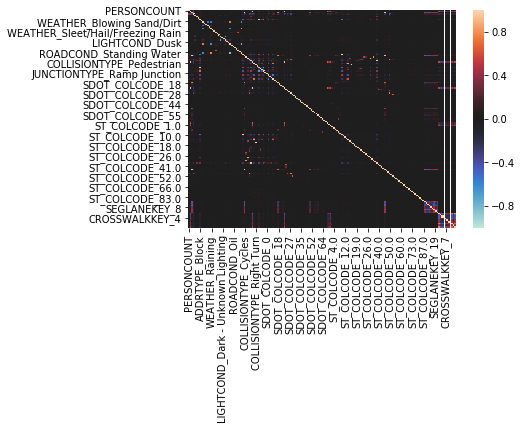

In [45]:
import seaborn as sns
corr = X_train.corr()
sns.heatmap(corr, vmin=-1, vmax=1, center= 0)

In [46]:
# Finding features with > 90% correlation
import itertools
for i, j in itertools.combinations(corr.columns, 2):
    if abs(corr.loc[i, j])>0.90:
        print(i,j, corr.loc[i, j])

PEDCOUNT COLLISIONTYPE_Pedestrian 0.9455974863712838
PEDCOUNT SDOT_COLCODE_24 0.9284001509821092
PEDCYLCOUNT COLLISIONTYPE_Cycles 0.989863709514695
PEDCYLCOUNT ST_COLCODE_45.0 0.9213836138998203
ADDRTYPE_Block JUNCTIONTYPE_At Intersection (intersection related) -0.9714923909985959
COLLISIONTYPE_Angles ST_COLCODE_10.0 1.0
COLLISIONTYPE_Cycles ST_COLCODE_45.0 0.9305288610413508
COLLISIONTYPE_Parked Car ST_COLCODE_32.0 0.9472288774207903
COLLISIONTYPE_Pedestrian SDOT_COLCODE_24 0.9747115164191715
COLLISIONTYPE_Right Turn ST_COLCODE_16.0 1.0


In [47]:
# Dropping these highly correlated columns
X_train.drop(columns=["COLLISIONTYPE_Pedestrian", "COLLISIONTYPE_Cycles", "JUNCTIONTYPE_At Intersection (intersection related)", 
                      "SDOT_COLCODE_24", "ST_COLCODE_45.0", "ST_COLCODE_10.0", "ST_COLCODE_32.0", "ST_COLCODE_16.0"], inplace=True)

### Methodology

Our data is now ready to be fed into machine learning models.

I will use the following models:

XG Boost
XG boost will help us predict the severity code of an outcome by finding the most similar to data point within k distance.

Random Forest
A decision tree model gives us a layout of all possible outcomes so we can fully analyze the concequences of a decision. It context, the decision tree observes all possible outcomes of different weather conditions.

#### Random Forest

In [48]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,roc_curve, roc_auc_score

In [49]:
rnf = RandomForestClassifier(random_state = 42)
train_predicted = cross_val_predict(rnf, X_train, y_train, cv=5)
accuracy = accuracy_score(y_train, train_predicted)
print("Model: Random Forest")
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Report:")
print(classification_report(y_train,train_predicted))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/Python36/lib/python3

Model: Random Forest
Accuracy: 73.90%
Report:
              precision    recall  f1-score   support

           1       0.76      0.90      0.83     88388
           2       0.63      0.38      0.47     39646

   micro avg       0.74      0.74      0.74    128034
   macro avg       0.70      0.64      0.65    128034
weighted avg       0.72      0.74      0.72    128034



#### XG Boost

In [50]:
xgb_clf = XGBClassifier(random_state = 42)
train_predicted = cross_val_predict(xgb_clf, X_train, y_train, cv=5)
accuracy = accuracy_score(y_train, train_predicted)
print("Model: XG Boost")
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Report:")
print(classification_report(y_train,train_predicted))

Model: XG Boost
Accuracy: 75.31%
Report:
              precision    recall  f1-score   support

           1       0.75      0.96      0.84     88388
           2       0.75      0.30      0.43     39646

   micro avg       0.75      0.75      0.75    128034
   macro avg       0.75      0.63      0.64    128034
weighted avg       0.75      0.75      0.71    128034



### Result

Comparing Random Forest model and XG Boost model, XG Boost model has a better performance with 75.31% accuracy.

### Discussion

The Random Forest model produces very close accuracy results with XG Boost model. Actually, those two models can be tuned with parameters. I believe that, after tuning, both models will have better performance.

### Conclusion

Based on this study, I find that weather, road condition, and light condition are fairly important causes for car accident. With a model using those characters to predict car collision accident rate, we would be able to get alert while we are driving on the road. 